### **Training a model (Module 5)**

This notebook is designed to be a standalone module/tutorial. It may repeat some information presented in previous modules.


This next step installs and loads fastbook. When using google colab, you may have to re-execute this command every time you re-connect.


In [2]:
!pip install -Uqq fastbook


     |████████████████████████████████| 727kB 8.0MB/s 
     |████████████████████████████████| 194kB 57.0MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 1.2MB 30.1MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 


You will be prompted to sign in to a google account and get a key code (opens in a new tab); you will need to sign into a google account and 
copy and paste the key into this notebook where prompted.

In [4]:
import fastbook
fastbook.setup_book()


Now load libraries from fastbook:

In [5]:
from fastbook import *
from fastai.vision.widgets import *

This next step allows you access directories in your google drive:

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
pwd

'/content/drive/My Drive/DL_images/workshop'

For this notebook, we will download a dataset that is in a zipped directory. You can put the dataset where you like on Google Drive, but you need to have the path to the directory match the below variable `path_handle`

In [20]:
path_handle = "/content/drive/My Drive/DL_images/workshop/"

Now go to this figshare [repository](https://figshare.com/s/c79a3340c23eac4b670b)

And download the dataset `image_dir.zip`







First we need to navigate to where we put the zipped directory.

In [21]:
os.chdir(path_handle)

In [22]:
pwd

'/content/drive/My Drive/DL_images/workshop'

In [24]:
ls

We now need to unzip the directory and check the organization of the files. 

In [26]:
import zipfile

zippy = zipfile.ZipFile('image_dir.zip')
zippy.extractall()

In [27]:
ls

image_dir/  image_dir.zip  __MACOSX/


In [28]:
image_directory = path_handle+"/image_dir"

In [80]:
os.chdir(image_directory)

In [31]:
ls

africana/   avium/        domestica/     javanica/  spinosa/      yedoensis/
americana/  caroliniana/  images_extra/  README     subhirtella/


In [32]:
mkdir work_dir


In [81]:
ls

africana/   avium/        domestica/     javanica/  spinosa/      work_dir/
americana/  caroliniana/  images_extra/  README     subhirtella/  yedoensis/


In [41]:
cp -r africana/ work_dir/

In [42]:
cp -r spinosa/ work_dir/

In [82]:
cp -r yedoensis/ work_dir/

In [83]:
working_dir = image_directory+"/work_dir"

In [102]:
os.chdir(working_dir)

In [104]:
ls

africana/  spinosa/


Here we can see how many images are in each category:

In [105]:
ls -l africana/*.jpg | wc

    100     900   10300


In [106]:
ls -l spinosa/*.jpg | wc

     98     882    9898


Read in data. The output will show the number of files read in.

In [107]:
readin = get_image_files(working_dir)
readin

(#198) [Path('/content/drive/My Drive/DL_images/workshop/image_dir/work_dir/africana/africana_cb2211d7-1182-498c-8b58-345e0aff8d21.jpg'),Path('/content/drive/My Drive/DL_images/workshop/image_dir/work_dir/africana/africana_31a39917-ef7f-4d9c-ab3d-f5a25271717b.jpg'),Path('/content/drive/My Drive/DL_images/workshop/image_dir/work_dir/africana/africana_c379e030-7cf8-4388-a9c6-cef907b0d748.jpg'),Path('/content/drive/My Drive/DL_images/workshop/image_dir/work_dir/africana/africana_7d4f78e7-52dc-4cb6-8cde-be46fa30af62.jpg'),Path('/content/drive/My Drive/DL_images/workshop/image_dir/work_dir/africana/africana_5699f7b1-1ddb-4889-b7ea-73f041aaaeb8.jpg'),Path('/content/drive/My Drive/DL_images/workshop/image_dir/work_dir/africana/africana_0de62072-7f2b-4e9e-831c-45e57b01dc45.jpg'),Path('/content/drive/My Drive/DL_images/workshop/image_dir/work_dir/africana/africana_9ae6b01a-30c3-4bef-8d91-c5dd9bf59fda.jpg'),Path('/content/drive/My Drive/DL_images/workshop/image_dir/work_dir/africana/africana_db7

In [ ]:
print(readin)

[Path('/content/drive/My Drive/DL_images/workshop_images/set1/avium/avium_12298494-7a47-481d-84bf-1774e5e0b58e.jpg'), Path('/content/drive/My Drive/DL_images/workshop_images/set1/avium/avium_05f9cae7-4700-4f55-9cb1-10e152c38677.jpg'), Path('/content/drive/My Drive/DL_images/workshop_images/set1/avium/avium_0baeb7f4-ac49-4b5a-abfe-6cd5f105ca48.jpg'), Path('/content/drive/My Drive/DL_images/workshop_images/set1/avium/avium_114ff8ff-2a30-43c4-a443-ad9f10719d3d.jpg'), Path('/content/drive/My Drive/DL_images/workshop_images/set1/avium/avium_08c2e875-7455-4ef1-adea-5362cf69f7f6.jpg'), Path('/content/drive/My Drive/DL_images/workshop_images/set1/avium/avium_091dff4e-c638-4640-811a-ce1589a30963.jpg'), Path('/content/drive/My Drive/DL_images/workshop_images/set1/avium/avium_00dca403-49a2-44f3-b52e-503793189b5a.jpg'), Path('/content/drive/My Drive/DL_images/workshop_images/set1/avium/avium_0c0e9be2-59c1-4ecb-b4ec-0ea2fb97ad83.jpg'), Path('/content/drive/My Drive/DL_images/workshop_images/set1/av

If too many warnings, can suppress them:

We can check for files that failed and remove them.

In [96]:
failed = verify_images(readin)
print(failed)

[]


No news is good news. If we did have warnings, we could remove corrupted/problematic files with the following command:

In [51]:
failed.map(Path.unlink);

In [108]:
model_1 = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [109]:
dls = model_1.dataloaders(working_dir)

In [110]:
model_1 = model_1.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())


dls = model_1.dataloaders(working_dir)

In [111]:
learn_1 = cnn_learner(dls, resnet18, metrics=error_rate)

In [112]:
learn_1.fine_tune(3)
learn_1.export('model_1_3epoch.pkl')


epoch,train_loss,valid_loss,error_rate,time
0,1.161372,0.630898,0.307692,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.923262,0.388104,0.179487,00:37
1,0.638810,0.178415,0.076923,00:37
2,0.469288,0.087257,0.025641,00:38


We exported the model as a .pkl file, so that we can read it back in later, without using GPUs again to re-process the model.

The above 3 epochs took about 3-4 minutes to complete, with 2 species and ~100 images per species.

The time for learning will increase with the number of images, size of images, number of categories (in our case, species).

We can generate a confusion matrix to assess the performance of this model using the training and validation data.

In [66]:
interp_1 = ClassificationInterpretation.from_learner(learn_1)

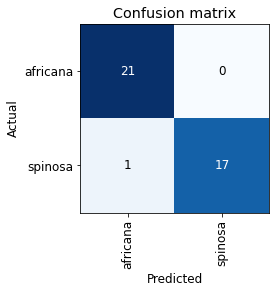

In [67]:
interp_1.plot_confusion_matrix()

The confusion matrix, loss, and error rate statistics for this simple model look really good at first glance--only a 2.5% error rate. However, we need to investigate to make sure our model wasn't overtrained/overfit, or was able to memorize the specific images.

We can test the performance of our model other images that weren't included in the initial dataset. 

In [113]:
img1 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/alabamensis_1f9b6f69-61a9-411b-a547-5c1c94407299.jpg'
img2 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/americana_028173c0-7946-4356-831e-5c731f20000a.jpg'
img3 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/amplifolia_738109d6-b734-4098-9c3a-40627abaf499.jpg'
img4 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/annularis_66a74a0d-6953-4249-beb7-83786fd87ea8.jpg'
img5 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/blireiana_36d1fc1d-c9da-428a-aaba-34e187f333e2.jpg'
img6 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/brachybotrya_38532145-872c-49ed-af04-ed29fc09db4a.jpg'
img7 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/brachypoda_de8ca64c-95d0-4a8a-b9d0-d4fb5ddc6393.jpg'
img8 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/brigantina_ecde993e-9800-47f3-a306-f6dc4ae92303.jpg'
img9 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/cerasus_0159f66b-ff40-49ad-b4a9-9fa20aa9841d.jpg'
img10 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/cerasus_0778dbf6-9463-4b08-b398-284f6434f023.jpg'
img11 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/cerasus_0fdc0cd3-533c-4f35-b3cf-efbbf7ea0f97.jpg'
img12 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/cerasus_36a88d12-e64c-4116-a26f-da1c437890dd.jpg'
img13 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/costata_2499117d-c572-4194-814d-a7c411365294.jpg'
img14 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/debilis_c0454325-b4a2-43ce-8070-3db69713d50f.jpg'
img15 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/fordiana_2be78775-0d5f-4418-ad1a-ecece2818595.jpg'
img16 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/gazelle-peninsulae_bb4f8f5d-e75b-4e6a-815c-74c213500759.jpg'
img17 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/glandulosa_af7c30b3-0a3a-4b85-936b-6b076d2abea3.jpg'
img18 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/glandulosa_e8adaf3f-3ff1-4089-8c7a-0cd0d2d297c5.jpg'
img19 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/grayana_3fa4668a-0f52-4dd4-bf9a-49cb4bab6180.jpg'
img20 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/grisea_5ff239a0-6013-4fd7-b965-632dc52d40ec.jpg'
img21 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/lyonii_a56818e5-43fb-4778-a870-148e4daa9f37.jpg'
img22 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/mandshurica_3626ebe6-40a4-4caa-ae99-e0d7f60c358a.jpg'
img23 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/mandshurica_ab371562-476b-4df5-b57c-d237e4ca442a.jpg'
img24 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/obtusata_add8dacf-0021-4af2-9eb8-0e285c0092a1.jpg'
img25 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/oocarpa_e75c3b1b-1b47-4c58-896d-11bd0050d6ae.jpg'
img26 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/padus_127d7369-992e-450c-8be4-f2b3ffb22403.jpg'
img27 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/reflexa_3679ac08-edc1-48a8-b804-f769b363c0a3.jpg'
img28 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/salicina_216d7b62-0152-421e-a6c1-0572981c4122.jpg'
img29 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/salicina_372be93b-144c-47a6-b8bf-4b2628259dbd.jpg'
img30 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/sargentii_ef43010d-72b4-4974-82aa-d08149ce5de3.jpg'
img31 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/sibirica_65545b46-11c4-438f-aac4-2e20fb7047a7.jpg'
img32 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/skutchii_34c02098-4586-4f0e-b884-d976badfb1e8.jpg'
img33 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/spinulosa_1e9d54cb-8871-4fa5-a4c0-8d2108ec25b4.jpg'
img34 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/stipulacea_762d4d58-5621-4bb4-b556-ad0d8300dcf7.jpg'
img35 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/susquehanae_4d868246-facd-4011-991c-8133210aae0e.jpg'
img36 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/tomentosa_a949557f-94dd-4297-be14-993433091da2.jpg'
img37 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/triloba_776d72e9-ee68-4f04-869c-4df2c0173405.jpg'
img38 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/umbellata_0cbee74e-c4b4-4c72-8e8e-e77f477885c2.jpg'
img39 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/undulata_c8dfe154-6b33-4f76-a979-76037256b2fa.jpg'
img40 = '/content/drive/My Drive/DL_images/workshop_images/images_extra/iDigBio/virginiana_034d95ab-2588-46bc-b1bd-166cb62873e1.jpg'


In [76]:
pred,pred_idx,probs = learn_1.predict(img1)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: africana; Probability: 0.9996')

In [77]:
pred,pred_idx,probs = learn_1.predict(img2)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: africana; Probability: 0.6176')

In [114]:
pred,pred_idx,probs = learn_1.predict(img3)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: africana; Probability: 0.9999')

In [115]:
pred,pred_idx,probs = learn_1.predict(img4)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: africana; Probability: 0.9999')

In [116]:
pred,pred_idx,probs = learn_1.predict(img5)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: africana; Probability: 0.7818')

In [117]:
pred,pred_idx,probs = learn_1.predict(img17)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: africana; Probability: 0.9019')

In [118]:
pred,pred_idx,probs = learn_1.predict(img18)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: africana; Probability: 0.9446')

In [121]:
pred,pred_idx,probs = learn_1.predict(img22)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: africana; Probability: 1.0000')

In [122]:
pred,pred_idx,probs = learn_1.predict(img23)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: africana; Probability: 0.9763')

In [123]:
pred,pred_idx,probs = learn_1.predict(img28)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: spinosa; Probability: 0.8787')

In [124]:
pred,pred_idx,probs = learn_1.predict(img29)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: africana; Probability: 0.9991')